In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('tf-pipeline')
jovian.set_colab_id('1HiS3bfAXLRHkbO_2PLiux_u93CGLyEmw')

     |████████████████████████████████| 71kB 5.3MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!echo '{"username":"rishabdhar1619","key":"e98cc96416187e523deb76d1e6737988"}' > ../root/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/blood-cells
!ls
!unzip \*.zip  && rm *.zip

In [5]:
train_path = '/content/dataset2-master/dataset2-master/images/TRAIN'
test_path = '/content/dataset2-master/dataset2-master/images/TEST'

In [6]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [8]:
train_images = train_generator.flow_from_directory(train_path,
                                                   shuffle=True,
                                                   target_size=(224,224),
                                                   subset='training',
                                                   batch_size=32)

test_images = test_generator.flow_from_directory(test_path,
                                                 shuffle=False,
                                                 target_size=(224,224),
                                                 batch_size=32)

val_images = train_generator.flow_from_directory(train_path,
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset='validation',
                                                 batch_size=32,)

Found 8466 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 1491 images belonging to 4 classes.


In [9]:
class ResNet(tf.keras.Model):
  def __init__(self, num_classes=4):
    super(ResNet, self).__init__()
    # inp = tf.keras.layers.Input(shape=(256, 256, 3))
    self.resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet',
                                                 input_shape=(224,224,3))
    self.preprocess = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input)
    self.pooling = tf.keras.layers.GlobalAveragePooling2D()
    self.dense1 = tf.keras.layers.Dense(num_classes, activation='softmax')

  def call(self, inputs):
    x = self.preprocess(inputs)
    x = self.resnet(x)
    x = self.pooling(x)
    x = self.dense1(x)
    return x

In [10]:
if __name__ == "__main__":
  resnet = ResNet()
  resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  resnet.fit(train_images, validation_data=val_images, epochs=50,
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
             ])

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/50
265/265 [==============================] - 125s 451ms/step - loss: 0.6214 - accuracy: 0.7711 - val_loss: 5.4990 - val_accuracy: 0.5500
Epoch 2/50
265/265 [==============================] - 118s 446ms/step - loss: 0.1699 - accuracy: 0.9394 - val_loss: 0.1800 - val_accuracy: 0.9302
Epoch 3/50
265/265 [==============================] - 118s 445ms/step - loss: 0.0829 - accuracy: 0.9703 - val_loss: 131.3742 - val_accuracy: 0.2495
Epoch 4/50
265/265 [==============================] - 118s 443ms/step - loss: 0.1931 - accuracy: 0.9297 - val_loss: 1.1647 - val_accuracy: 0.7840
Epoch 5/50
265/265 [==============================] - 118s 444ms/step - loss: 0.0778 - accuracy: 0.9712 - val_loss: 0.2105 - val_accuracy: 0.9269


In [17]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Test Accuracy: 84.922%


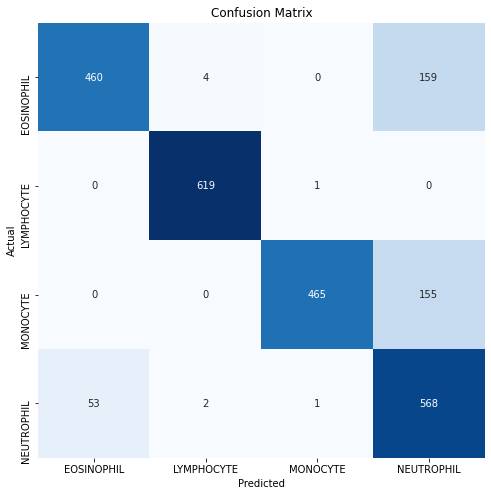

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

predictions = np.argmax(resnet.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
test_image = tf.keras.preprocessing.image.load_img(
    '/content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_0_1845.jpeg',
    target_size = (224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = np.argmax(resnet.predict(test_image), axis=1)
print(result)
train_images.class_indices

[0]


{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [21]:
resnet.save('/content/gdrive/MyDrive/Jovian/rishabdhar12 blood-cell-images/model_2')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Jovian/rishabdhar12 blood-cell-images/model_2/assets


In [23]:
jovian.commit('blood-cell-new')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rishabdhar12/tf-pipeline


'https://jovian.ai/rishabdhar12/tf-pipeline'